In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [24]:
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

In [25]:
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [26]:
df['Region'].unique()

array(['Europe', 'Asia', 'North America', 'South America', 'Oceania',
       'Africa'], dtype=object)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [28]:
len(df)

5000

In [29]:
df.isnull().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

In [30]:
df.fillna(method='ffill', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_14800\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [31]:
con = sqlite3.connect('RemoteWork.db')

In [32]:
%load_ext sql 

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [33]:
%sql sqlite:///RemoteWork.db

In [34]:
df.to_sql('UseTable',con,if_exists = 'replace',index = False)

5000

# 1. Demographics of the Workforce


In [35]:
%%sql

SELECT Age, COUNT(Employee_ID) AS Num_Employees
FROM UseTable
GROUP BY Age
ORDER BY Age;


 * sqlite:///RemoteWork.db
Done.


Age,Num_Employees
22,131
23,142
24,138
25,145
26,109
27,129
28,131
29,112
30,133
31,124


In [36]:
%%sql

SELECT Gender, COUNT(Employee_ID) AS Num_Employees
FROM UseTable
GROUP BY Gender;


 * sqlite:///RemoteWork.db
Done.


Gender,Num_Employees
Female,1274
Male,1270
Non-binary,1214
Prefer not to say,1242


# 2. Job Role and Industry Insights


In [37]:
%%sql 
SELECT Job_Role, COUNT(Employee_ID) AS Num_Employees
FROM UseTable
GROUP BY Job_Role
ORDER BY Num_Employees DESC;


 * sqlite:///RemoteWork.db
Done.


Job_Role,Num_Employees
Project Manager,738
Sales,733
Designer,723
HR,716
Software Engineer,711
Data Scientist,696
Marketing,683


Industry Breakdown

In [38]:
%%sql

SELECT Industry, COUNT(Employee_ID) AS Num_Employees
FROM UseTable
GROUP BY Industry
ORDER BY Num_Employees DESC;


 * sqlite:///RemoteWork.db
Done.


Industry,Num_Employees
Finance,747
IT,746
Healthcare,728
Retail,726
Education,690
Manufacturing,683
Consulting,680


# 3. Experience and Workload


In [39]:
%%sql

SELECT Job_Role, AVG(Years_of_Experience) AS Avg_Experience
FROM UseTable
GROUP BY Job_Role;


 * sqlite:///RemoteWork.db
Done.


Job_Role,Avg_Experience
Data Scientist,17.566091954022987
Designer,18.585062240663902
HR,17.600558659217878
Marketing,17.314787701317716
Project Manager,18.444444444444443
Sales,17.817189631650752
Software Engineer,17.282700421940927


Work Hours by Industry:


In [40]:
%%sql

SELECT Industry, AVG(Hours_Worked_Per_Week) AS Avg_Hours
FROM UseTable
GROUP BY Industry;


 * sqlite:///RemoteWork.db
Done.


Industry,Avg_Hours
Consulting,39.205882352941174
Education,39.428985507246374
Finance,39.19277108433735
Healthcare,40.06730769230769
IT,40.01742627345845
Manufacturing,40.241581259150806
Retail,39.150137741046834


# 4. Mental Health and Well-being


Mental Health Condition Frequency:


In [41]:
%%sql
SELECT Mental_Health_Condition, COUNT(Employee_ID) AS Num_Employees
FROM UseTable
GROUP BY Mental_Health_Condition;


 * sqlite:///RemoteWork.db
Done.


Mental_Health_Condition,Num_Employees
Anxiety,1655
Burnout,1699
Depression,1646


In [42]:
%%sql

SELECT Stress_Level, Access_to_Mental_Health_Resources, COUNT(Employee_ID) AS Num_Employees
FROM UseTable
GROUP BY Stress_Level, Access_to_Mental_Health_Resources;


 * sqlite:///RemoteWork.db
Done.


Stress_Level,Access_to_Mental_Health_Resources,Num_Employees
High,No,817
High,Yes,869
Low,No,870
Low,Yes,775
Medium,No,866
Medium,Yes,803


# 5. Work-Life Balance and Stress


In [43]:
%%sql

SELECT Industry, AVG(Work_Life_Balance_Rating) AS Avg_Balance
FROM UseTable
GROUP BY Industry;


 * sqlite:///RemoteWork.db
Done.


Industry,Avg_Balance
Consulting,2.9514705882352943
Education,3.0130434782608697
Finance,2.925033467202142
Healthcare,2.978021978021978
IT,3.045576407506702
Manufacturing,2.8799414348462666
Retail,3.0895316804407713


In [44]:
%%sql 

SELECT Hours_Worked_Per_Week, Stress_Level, COUNT(Employee_ID) AS Num_Employees
FROM UseTable
GROUP BY Hours_Worked_Per_Week, Stress_Level;


 * sqlite:///RemoteWork.db
Done.


Hours_Worked_Per_Week,Stress_Level,Num_Employees
20,High,36
20,Low,55
20,Medium,46
21,High,40
21,Low,42
21,Medium,39
22,High,49
22,Low,46
22,Medium,47
23,High,56


# 6. Remote Work Insights


In [45]:
%%sql
SELECT Region, AVG(Satisfaction_with_Remote_Work) AS Avg_Satisfaction
FROM UseTable
GROUP BY Region;


 * sqlite:///RemoteWork.db
Done.


Region,Avg_Satisfaction
Africa,0.0
Asia,0.0
Europe,0.0
North America,0.0
Oceania,0.0
South America,0.0


In [46]:
%%sql

SELECT Job_Role, AVG(Company_Support_for_Remote_Work) AS Avg_Support
FROM UseTable
GROUP BY Job_Role;


 * sqlite:///RemoteWork.db
Done.


Job_Role,Avg_Support
Data Scientist,3.0977011494252875
Designer,2.9308437067773165
HR,3.011173184357542
Marketing,3.020497803806735
Project Manager,3.0094850948509486
Sales,2.9672578444747613
Software Engineer,3.0225035161744023


# 7. Physical and Mental Health Correlation for Remote Workers


In [70]:
%%sql

SELECT Physical_Activity, 
       Sleep_Quality, 
       COUNT(*) * 1.0 / (SELECT COUNT(*) FROM UseTable WHERE Work_Location like 'Remote' AND Physical_Activity = t.Physical_Activity) AS Frequency
FROM  UseTable AS t
WHERE Work_Location like'Remote'
GROUP BY Physical_Activity, Sleep_Quality;



 * sqlite:///RemoteWork.db
Done.


Physical_Activity,Sleep_Quality,Frequency
Daily,Average,0.3419506462984724
Daily,Good,0.34782608695652173
Daily,Poor,0.3102232667450059
Weekly,Average,0.33719582850521435
Weekly,Good,0.3128621089223638
Weekly,Poor,0.3499420625724218


In [71]:
%%sql

SELECT Mental_Health_Condition, 
       AVG(Social_Isolation_Rating) AS Avg_Isolation
FROM UseTable
WHERE Work_Location like 'Remote'
GROUP BY Mental_Health_Condition;



 * sqlite:///RemoteWork.db
Done.


Mental_Health_Condition,Avg_Isolation
Anxiety,2.9649122807017543
Burnout,2.9863945578231292
Depression,2.931654676258993


In [73]:
%%sql

SELECT Access_to_Mental_Health_Resources, 
       Stress_Level AS Stress_Level
FROM UseTable
WHERE Work_Location like 'Remote'
GROUP BY Access_to_Mental_Health_Resources;


 * sqlite:///RemoteWork.db
Done.


Access_to_Mental_Health_Resources,Stress_Level
No,Medium
Yes,Low


# 8. Productivity and Job Satisfaction for Remote Workers


In [75]:
%%sql

SELECT Job_Role, Productivity_Change
FROM UseTable
WHERE Work_Location like 'Remote'
GROUP BY Job_Role;


 * sqlite:///RemoteWork.db
Done.


Job_Role,Productivity_Change
Data Scientist,Increase
Designer,Increase
HR,No Change
Marketing,Decrease
Project Manager,Decrease
Sales,Decrease
Software Engineer,Decrease


In [80]:
%%sql

SELECT DISTINCT(Satisfaction_with_Remote_Work), AVG(Work_Life_Balance_Rating) as avg_life_balance_rating
FROM UseTable
WHERE Work_Location like 'Remote'
GROUP BY Satisfaction_with_Remote_Work

 * sqlite:///RemoteWork.db
Done.


Satisfaction_with_Remote_Work,avg_life_balance_rating
Neutral,2.953565505804312
Satisfied,2.9672447013487475
Unsatisfied,3.027027027027027


In [82]:
%%sql

SELECT Work_Life_Balance_Rating, Productivity_Change
FROM UseTable
WHERE Work_Location like 'Remote'
GROUP BY Work_Life_Balance_Rating;


 * sqlite:///RemoteWork.db
Done.


Work_Life_Balance_Rating,Productivity_Change
1,Increase
2,Decrease
3,Decrease
4,No Change
5,Decrease


In [57]:
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

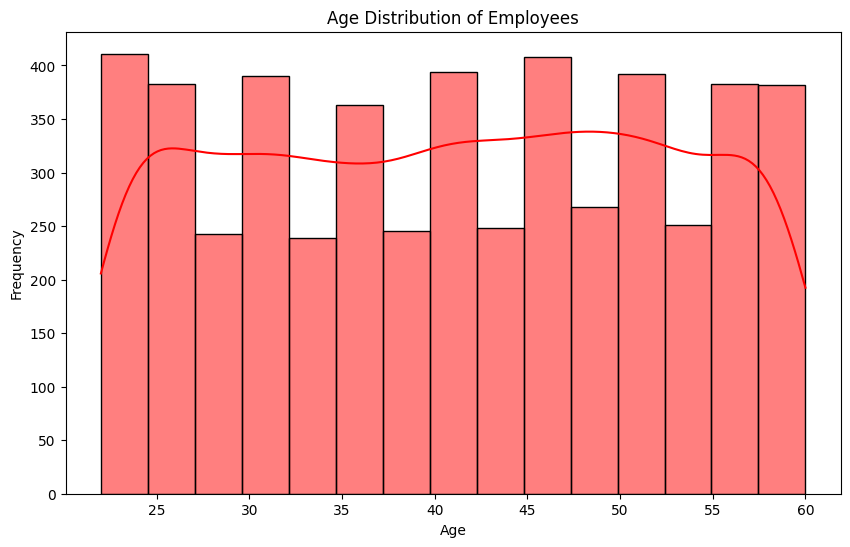

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='red')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


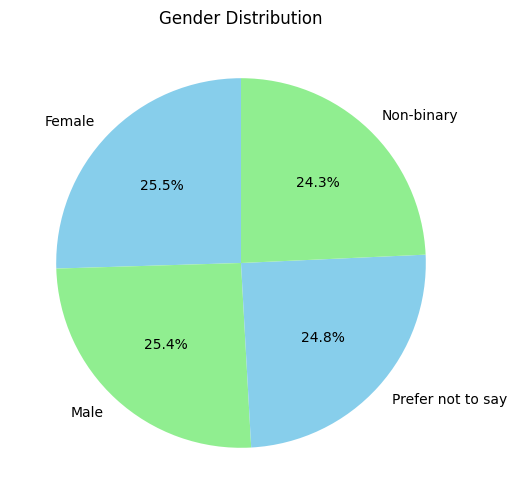

In [84]:
# Pie chart for gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_14800\132731452.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Job_Role', order=df['Job_Role'].value_counts().index, palette='viridis')


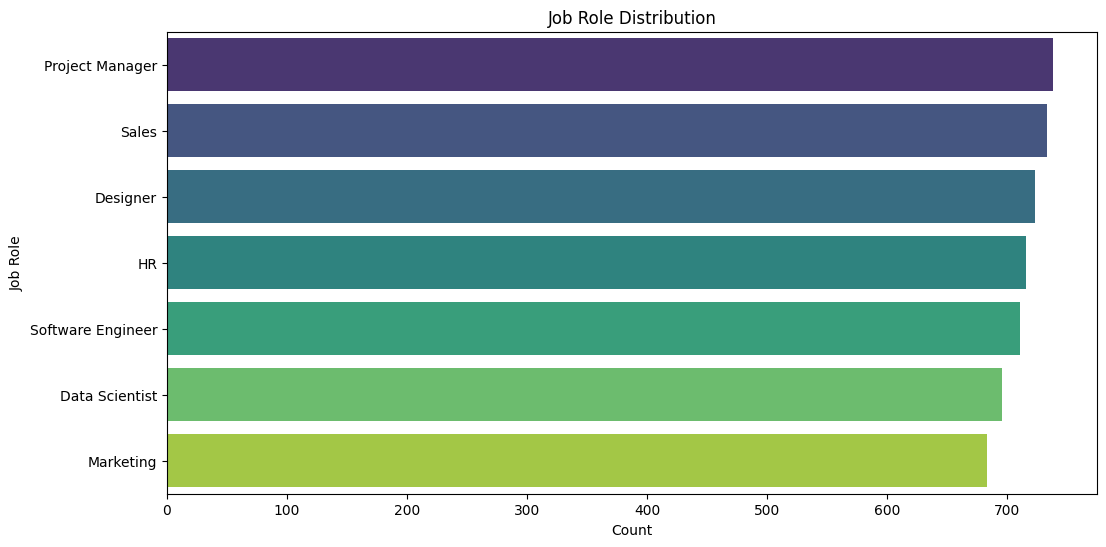

In [85]:
# Job role distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Job_Role', order=df['Job_Role'].value_counts().index, palette='viridis')
plt.title('Job Role Distribution')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_14800\1756125270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index, palette='magma')


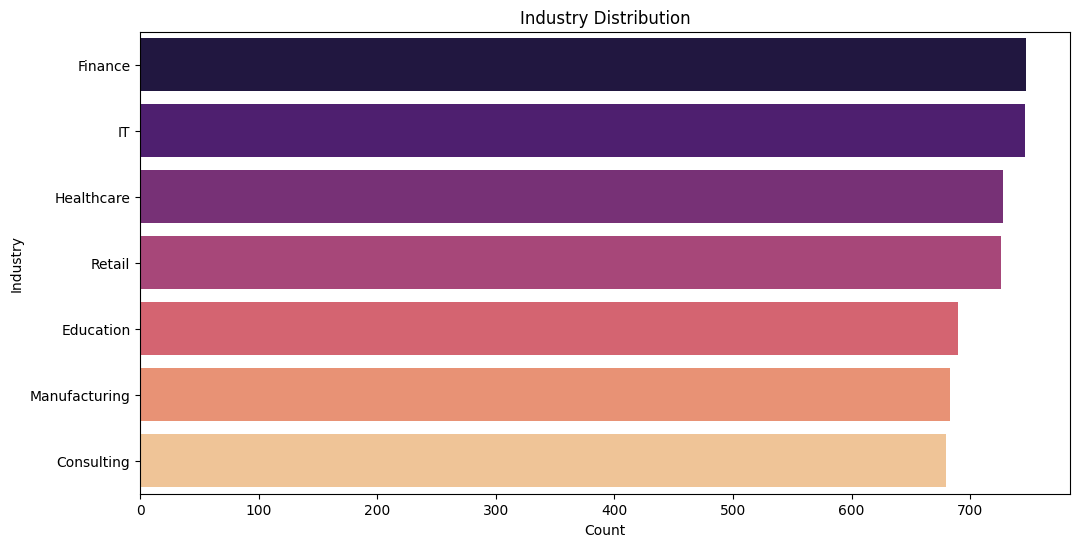

In [86]:
# Industry distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index, palette='magma')
plt.title('Industry Distribution')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_14800\598788825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Years_of_Experience', y='Satisfaction_with_Remote_Work', palette='coolwarm')


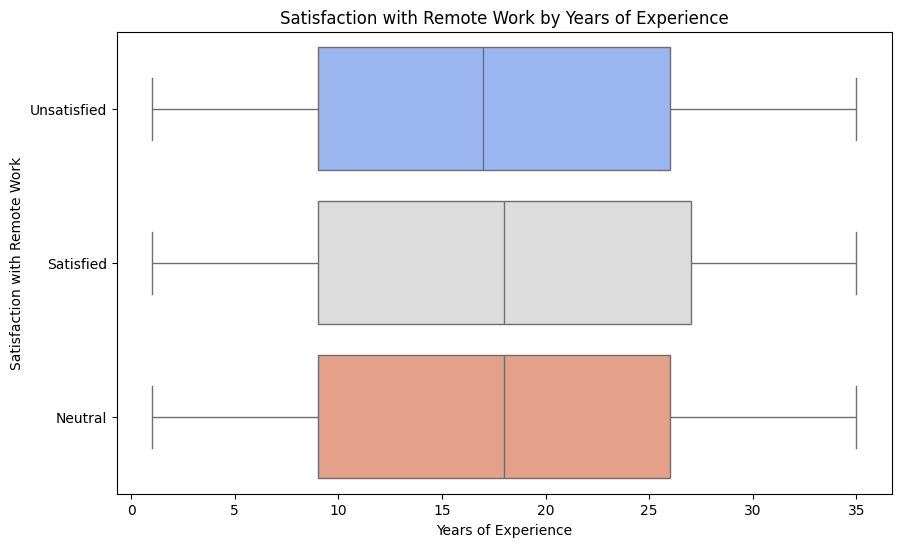

In [87]:
# Boxplot for Years of Experience vs. Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Years_of_Experience', y='Satisfaction_with_Remote_Work', palette='coolwarm')
plt.title('Satisfaction with Remote Work by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Satisfaction with Remote Work')
plt.show()


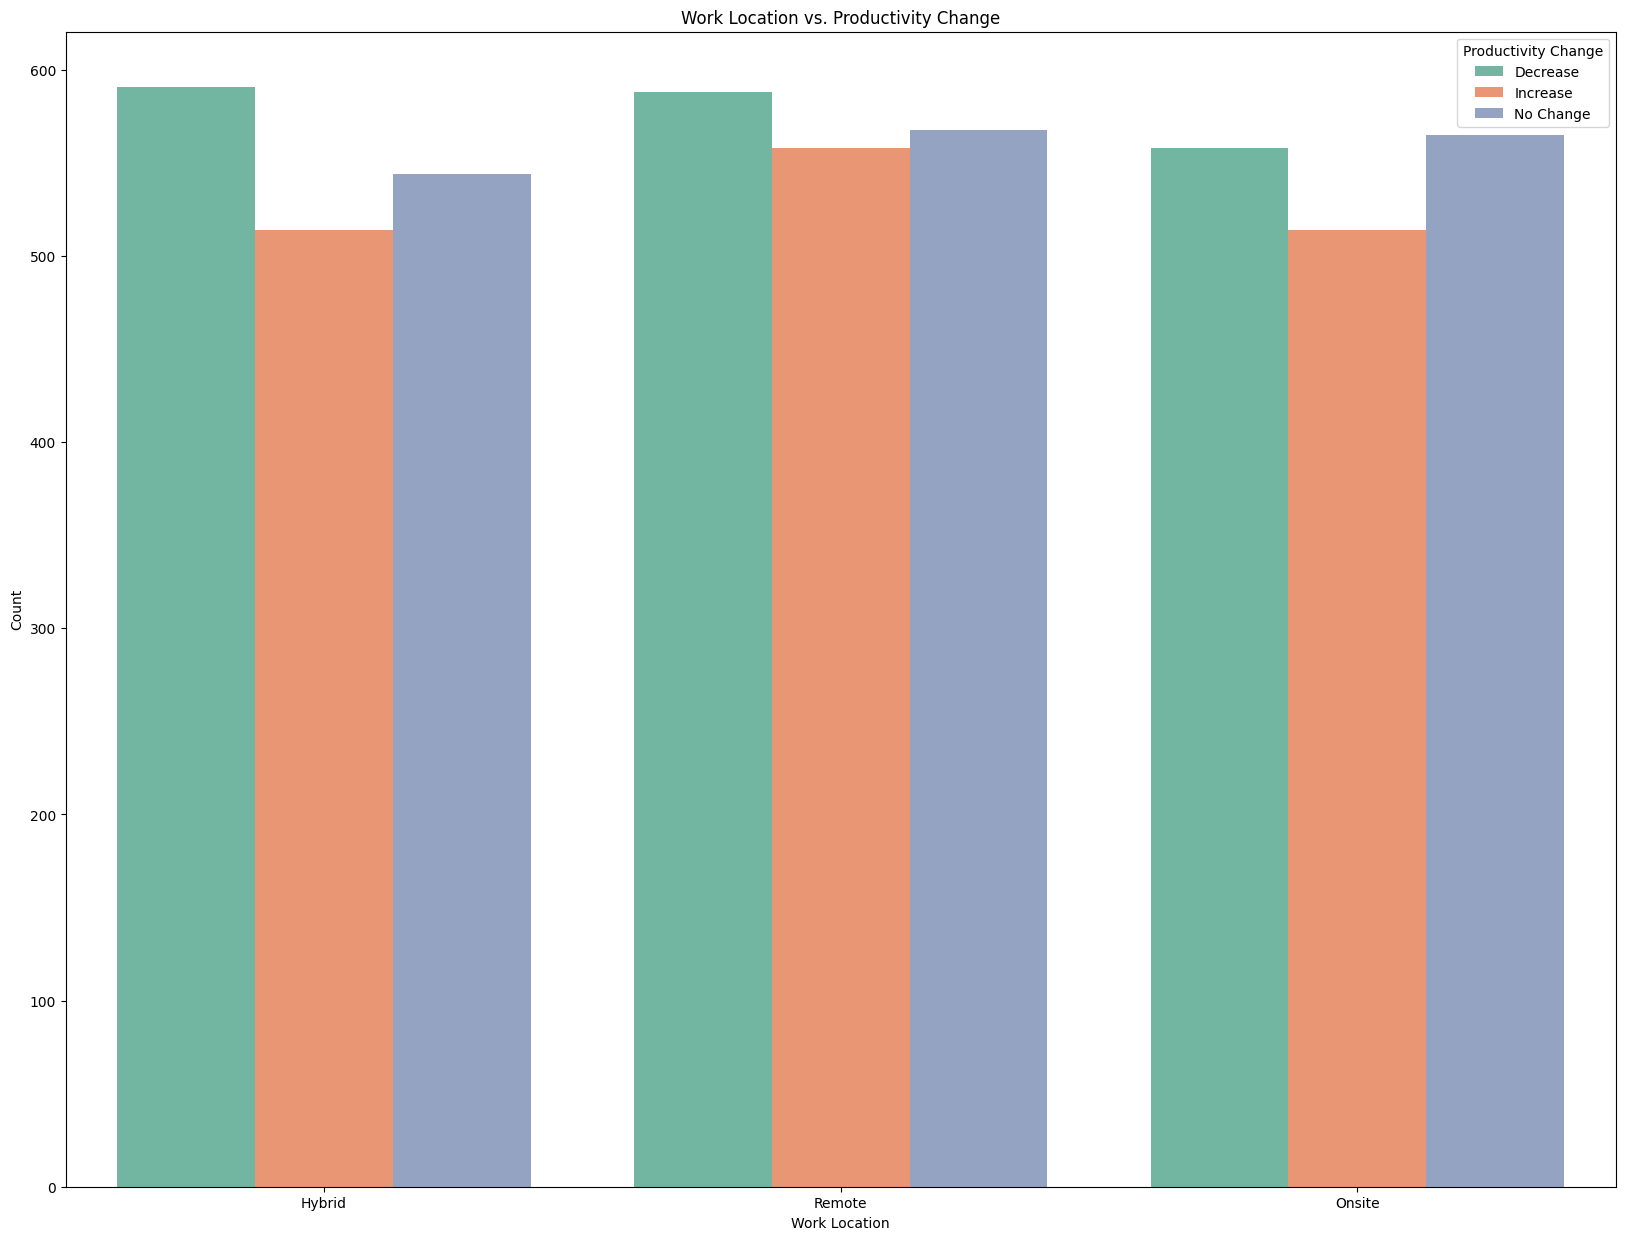

In [94]:
# Bar plot for Work Location vs. Productivity Change
plt.figure(figsize=(20, 15))
sns.countplot(data=df, x='Work_Location', hue='Productivity_Change', palette='Set2')
plt.title('Work Location vs. Productivity Change')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Productivity Change')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_14800\706928191.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Work_Life_Balance_Rating', palette='pastel')


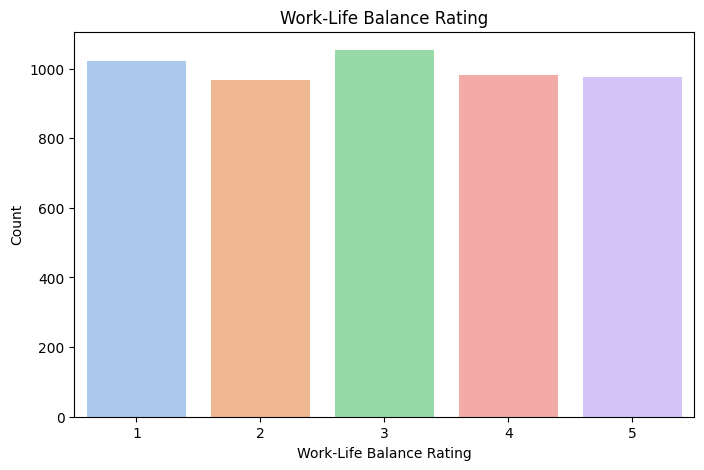

In [95]:
# Countplot for Work-Life Balance Rating
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Work_Life_Balance_Rating', palette='pastel')
plt.title('Work-Life Balance Rating')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Count')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_14800\2546269055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Mental_Health_Condition', palette='Set1')


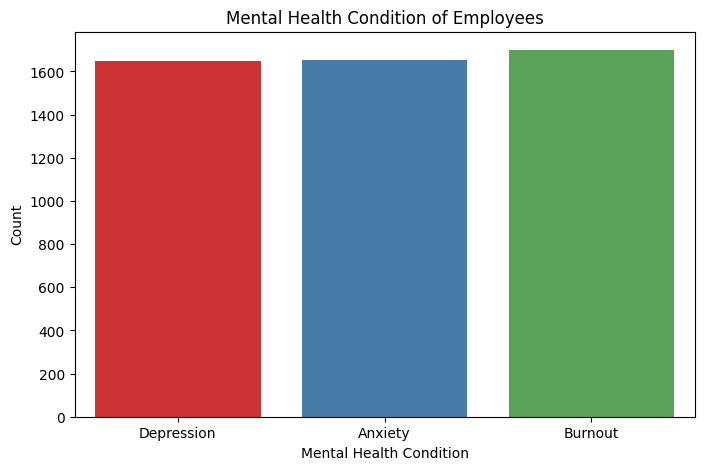

In [96]:
# Countplot for Mental Health Condition
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Mental_Health_Condition', palette='Set1')
plt.title('Mental Health Condition of Employees')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.show()


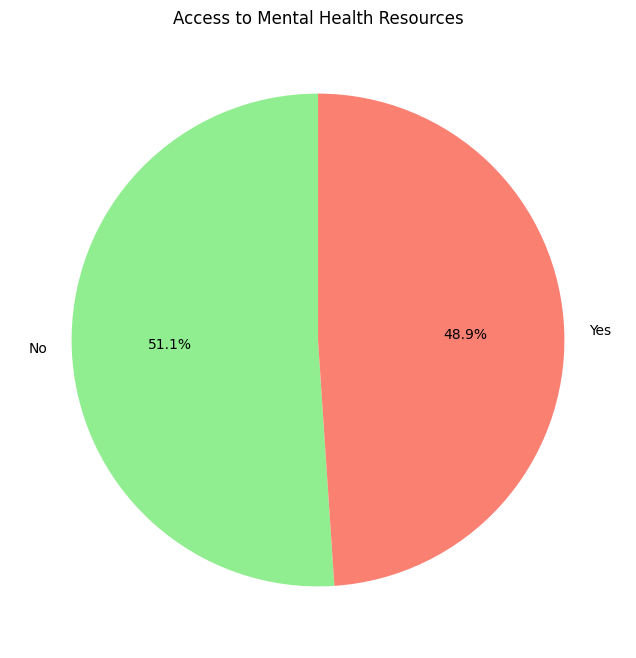

In [97]:
# Pie chart for Access to Mental Health Resources
plt.figure(figsize=(8, 8))
df['Access_to_Mental_Health_Resources'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Access to Mental Health Resources')
plt.ylabel('')
plt.show()


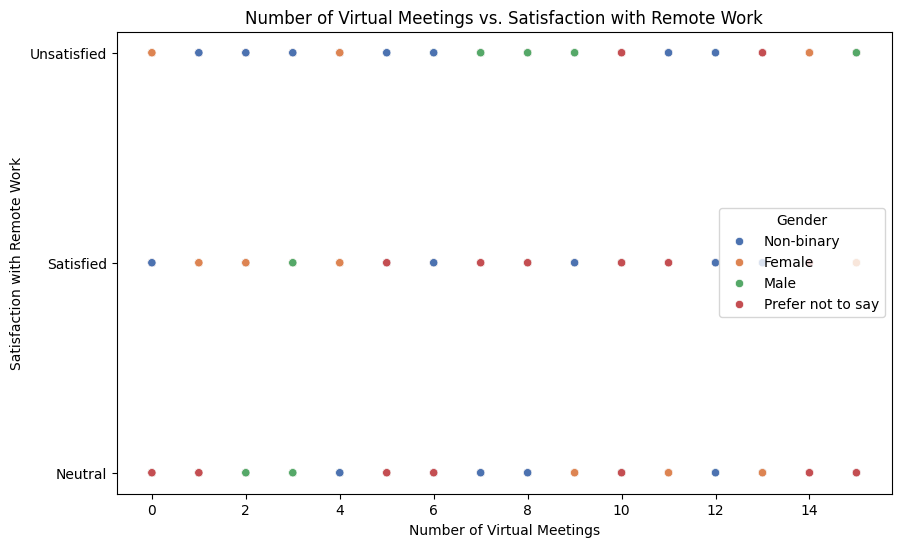

In [98]:
# Scatter plot for Number of Virtual Meetings vs. Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number_of_Virtual_Meetings', y='Satisfaction_with_Remote_Work', hue='Gender', palette='deep')
plt.title('Number of Virtual Meetings vs. Satisfaction with Remote Work')
plt.xlabel('Number of Virtual Meetings')
plt.ylabel('Satisfaction with Remote Work')
plt.show()


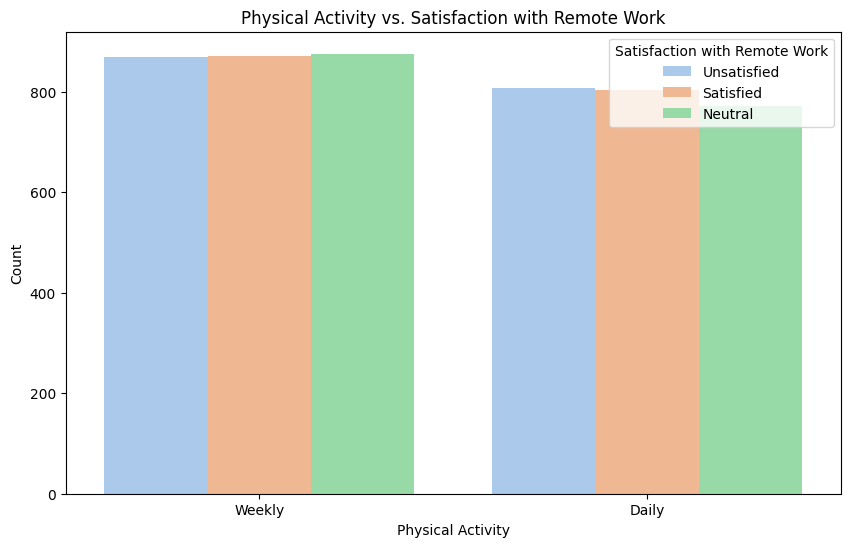

In [99]:
# Bar plot for Physical Activity vs. Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Physical_Activity', hue='Satisfaction_with_Remote_Work', palette='pastel')
plt.title('Physical Activity vs. Satisfaction with Remote Work')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.legend(title='Satisfaction with Remote Work')
plt.show()


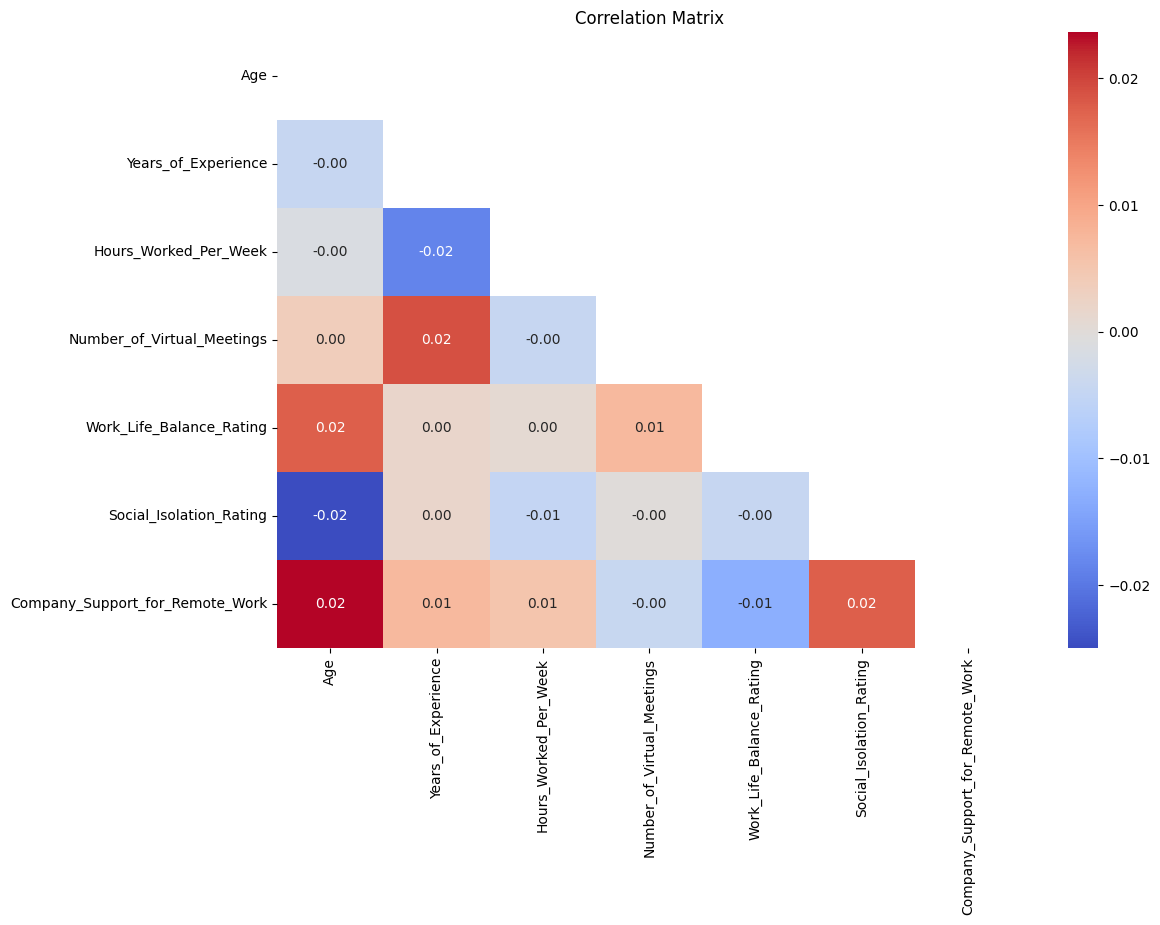

In [100]:
# Correlation matrix heatmap with only numeric columns
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix')
plt.show()


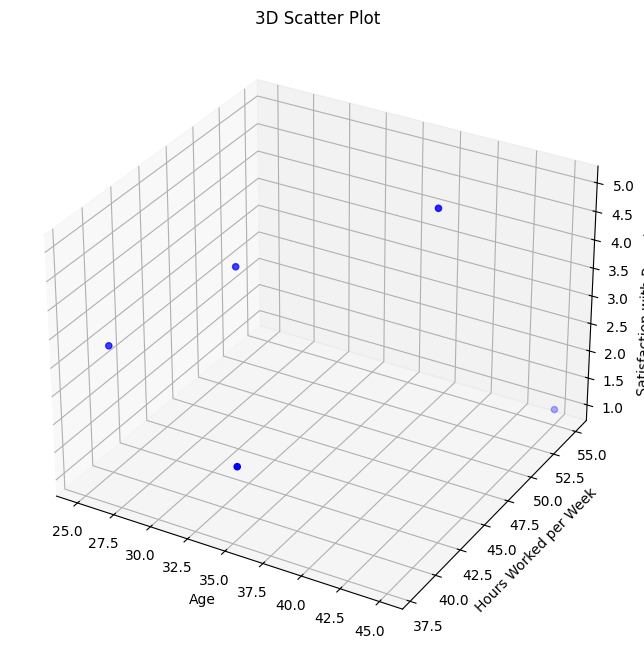

In [101]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Sample data
data = {
    'Age': [25, 30, 35, 40, 45],
    'Hours_Worked_Per_Week': [40, 45, 38, 50, 55],
    'Satisfaction_with_Remote_Work': [3, 4, 2, 5, 1]
}

df = pd.DataFrame(data)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Hours_Worked_Per_Week'], df['Satisfaction_with_Remote_Work'], c='b', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Hours Worked per Week')
ax.set_zlabel('Satisfaction with Remote Work')

plt.title('3D Scatter Plot')
plt.show()


Column Names:
Index(['Age', 'Hours_Worked_Per_Week', 'Satisfaction_with_Remote_Work'], dtype='object')

DataFrame Head:
   Age  Hours_Worked_Per_Week  Satisfaction_with_Remote_Work
0   25                     40                              3
1   30                     45                              4
2   35                     38                              2
3   40                     50                              5
4   45                     55                              1


C:\Users\Dell\AppData\Local\Temp\ipykernel_14800\3458699493.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Satisfaction_with_Remote_Work', palette='viridis')


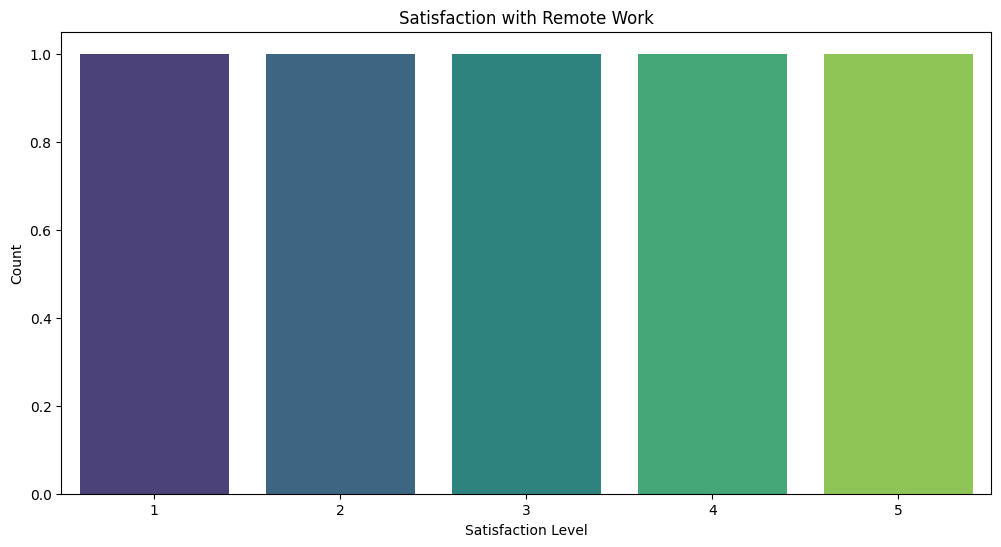

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (replace this with your actual data loading code)
# df = pd.read_csv('your_dataset.csv')

# Check the column names
print("Column Names:")
print(df.columns)

# Check the first few rows of the DataFrame
print("\nDataFrame Head:")
print(df.head())

# Create the count plot based on 'Satisfaction_with_Remote_Work' and 'Age'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Satisfaction_with_Remote_Work', palette='viridis')
plt.title('Satisfaction with Remote Work')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()


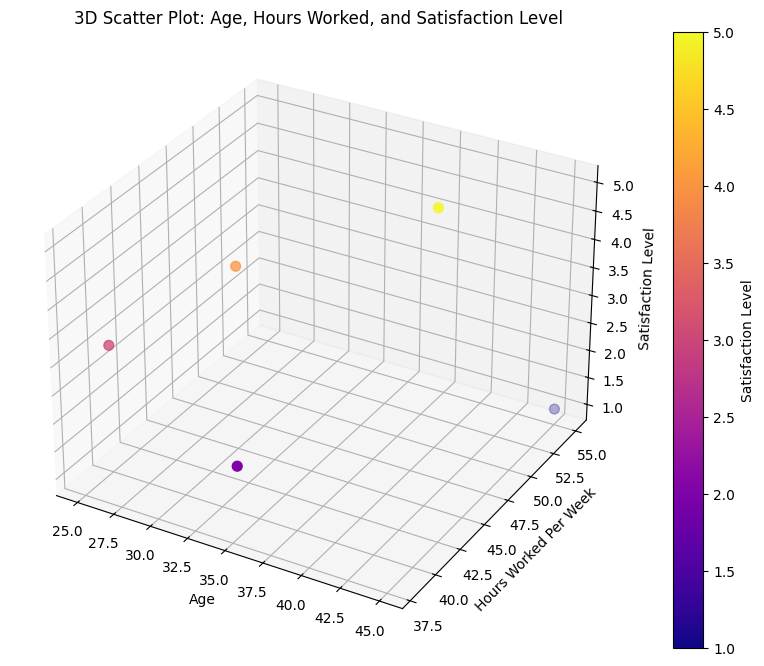

In [104]:
#Unique visualizations using 3D scatter plot and pair plot

# Import necessary libraries for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Age, Hours Worked, and Satisfaction Level
scatter = ax.scatter(df['Age'], df['Hours_Worked_Per_Week'], df['Satisfaction_with_Remote_Work'],
                     c=df['Satisfaction_with_Remote_Work'], cmap='plasma', s=50)

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Hours Worked Per Week')
ax.set_zlabel('Satisfaction Level')
ax.set_title('3D Scatter Plot: Age, Hours Worked, and Satisfaction Level')

# Color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Satisfaction Level')

plt.show()
